## Seaborn vs Matplotlib

Seaborn is an API built on top of Matplotlib that offers additional features not in the base mpl package.

First, let's demo styles difference between Seaborn and mpl classic.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
import pandas as pd

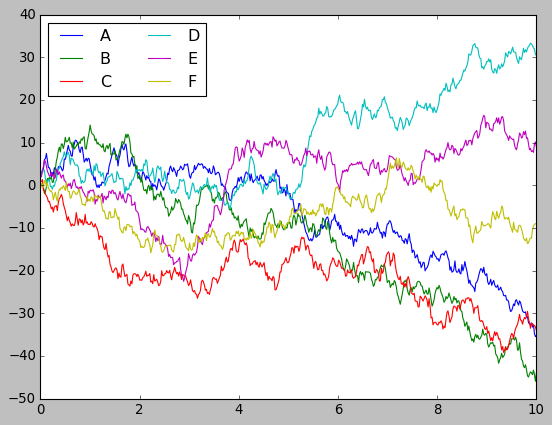

In [2]:
# Create a random walk, then plot w/ Matplotlib defaults
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

As stated, Seaborn is built on mpl.

In fact, simply importing seaborn will alter our matplotlib defaults.

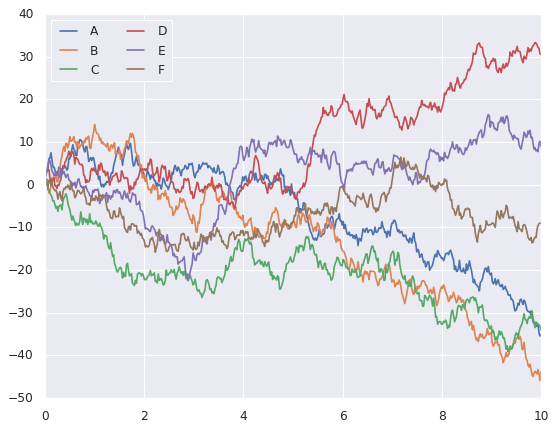

In [3]:
import seaborn as sns
sns.set()

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Really, the magic behind seaborn is that it's just a convenient set of pre-fab'd Matplotlib routines.

All it means is you don't have to re-invent the wheel by implementing all those mpl routines yourself.

### Seaborn Histograms, Kernel Density Estimation (KDE), and Probability Density Functions

** We didn't seed the rng for this, so expect your examples to look different than text.

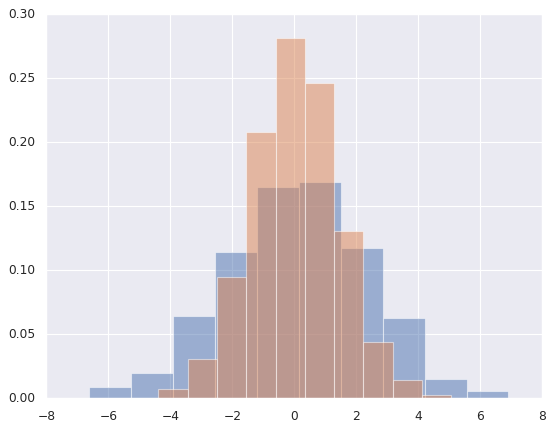

In [5]:
# Plot the joint distribution of multivariate-normal vars X,Y as a histogram.
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

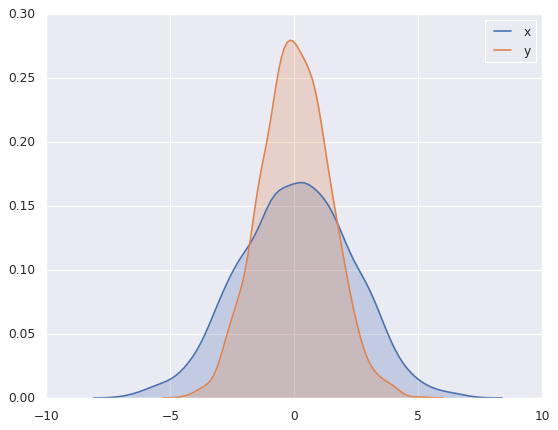

In [6]:
# Get a smooth estimate of joint PDF using sns's implementation of KDE
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

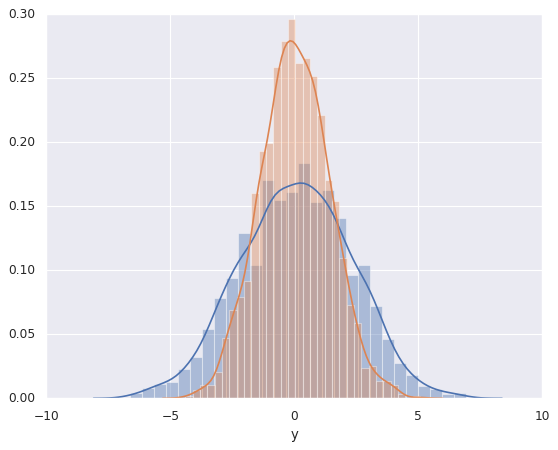

In [7]:
# Combine histogram with KDE
sns.distplot(data['x'])
sns.distplot(data['y']);

/home/pete/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


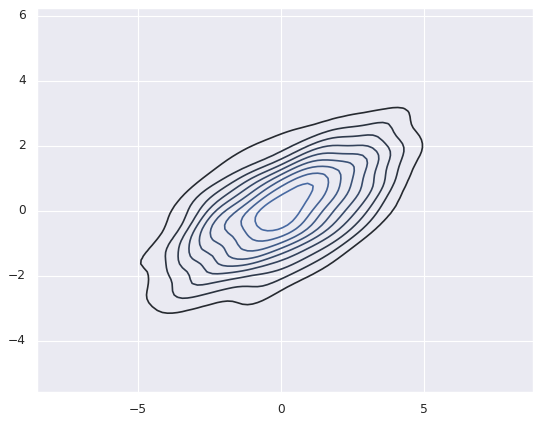

In [8]:
# Passing multivariate data (without splitting out vars) to kdeplot yields a 2D visualization:
sns.kdeplot(data);

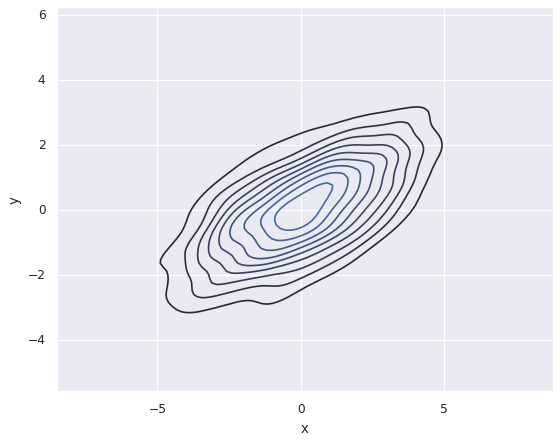

In [13]:
# Oh that's nice, it now wants you to be explicit about the vars you're passing in,
# auto-filling axis labels accordingly.
sns.kdeplot(data['x'], data['y']);

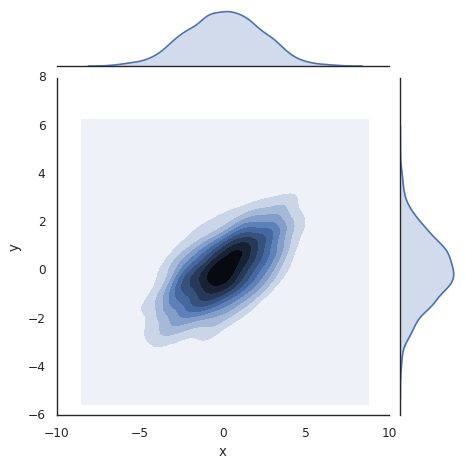

In [15]:
# For joint distributions / marginal distributions, use sns.jointplot()
with sns.axes_style('white'):
    sns.jointplot('x','y', data, kind='kde');

^^ Mine is outputting differently, does not include summary stats at top-right corner

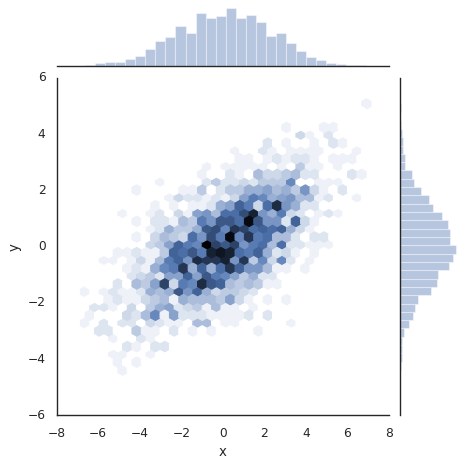

In [16]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='hex')

### Pair Plots

Now, we want to generalize joint plots to datasets of dimension > 2.

Pair plots allow us to explore correlations on such higher multidimensional data by plotting pairs of values against each other.

Explore by demo in the Iris dataset.

In [17]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


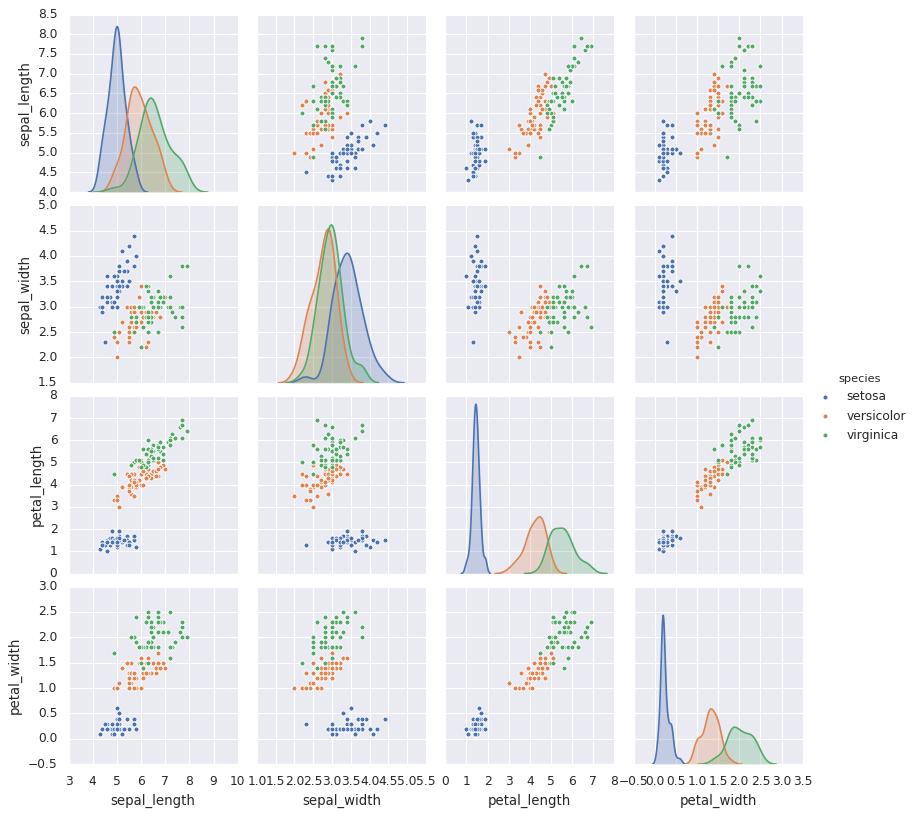

In [21]:
# Note: Behavior is different than book - discrete dists automatically get resolved to continuous via KDE
sns.pairplot(iris, hue='species', height=2.5);

### Faceted histograms:

I.e. histograms over subsets. We'll use Seaborn's FacetGrid() to accomplish this.

Dataset used: restaurant staff tips

In [22]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


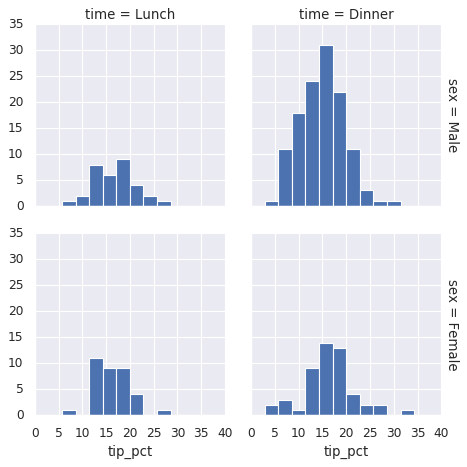

In [23]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 15));

### Factor plots:

On the same dataset, use a factor plot to view tge distribution of a parameter in a bin defined by some other param.

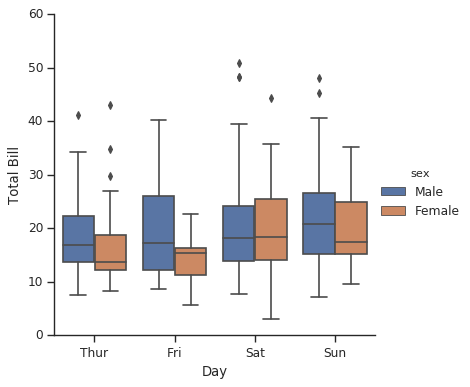

In [25]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

Note the use of Python's 'with' keyword.

See this piece for an explanation, specifically the final example makes it quite clear the use of 'with'.

https://effbot.org/zone/python-with-statement.htm

### Joint distributions

Show joint distributio between different datasets w/ associated marginal distributions

In [26]:
with sns.axes_style('white'):
    sns.catplot("total_bill", "tip", data=tips, kind='hex')

ValueError: Plot kind 'hex' is not recognized